In [37]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Create Threshold for Grayscale

In [38]:
dog = cv2.imread("img\img\dog.jpg")

In [39]:
dog

array([[[ 30, 116, 110],
        [ 30, 116, 110],
        [ 30, 116, 110],
        ...,
        [ 10, 118,  82],
        [ 10, 118,  82],
        [ 10, 118,  82]],

       [[ 30, 116, 110],
        [ 30, 116, 110],
        [ 30, 116, 110],
        ...,
        [ 11, 119,  83],
        [ 10, 118,  82],
        [ 10, 118,  82]],

       [[ 28, 116, 110],
        [ 28, 116, 110],
        [ 28, 117, 108],
        ...,
        [ 13, 119,  83],
        [ 13, 119,  83],
        [ 12, 118,  82]],

       ...,

       [[139, 180, 172],
        [139, 182, 171],
        [140, 189, 173],
        ...,
        [  8,  93,  48],
        [ 14,  97,  52],
        [ 15,  96,  51]],

       [[140, 181, 173],
        [140, 183, 172],
        [141, 190, 174],
        ...,
        [  1,  86,  41],
        [  5,  89,  41],
        [  5,  86,  39]],

       [[135, 176, 168],
        [135, 178, 167],
        [135, 184, 168],
        ...,
        [  0,  71,  26],
        [  0,  75,  27],
        [  0,  74,  27]]

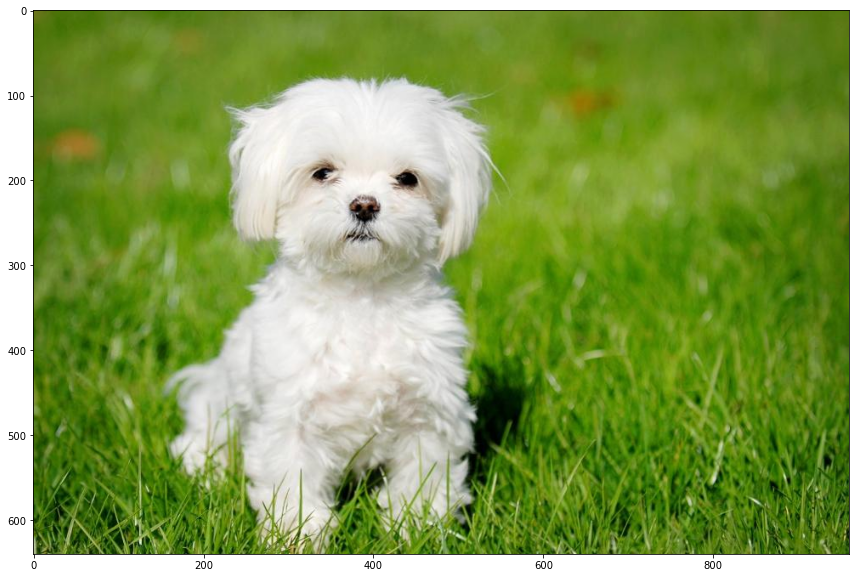

In [40]:
rgb_img= cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)            

plt.figure(figsize= (15, 10))
plt.imshow(rgb_img)

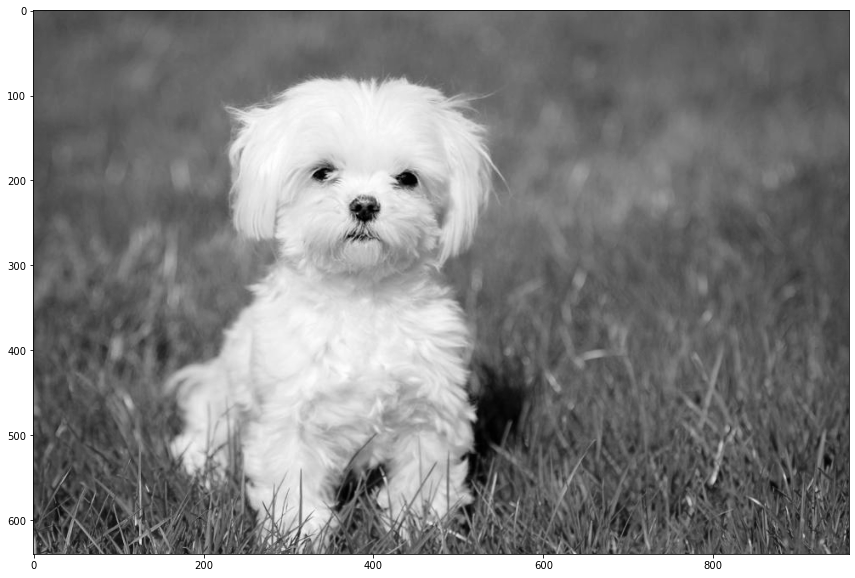

In [41]:
gray_dog = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize= (15, 10))
plt.imshow(gray_dog, cmap= "gray")

retval value:  200.0
dst value:  255


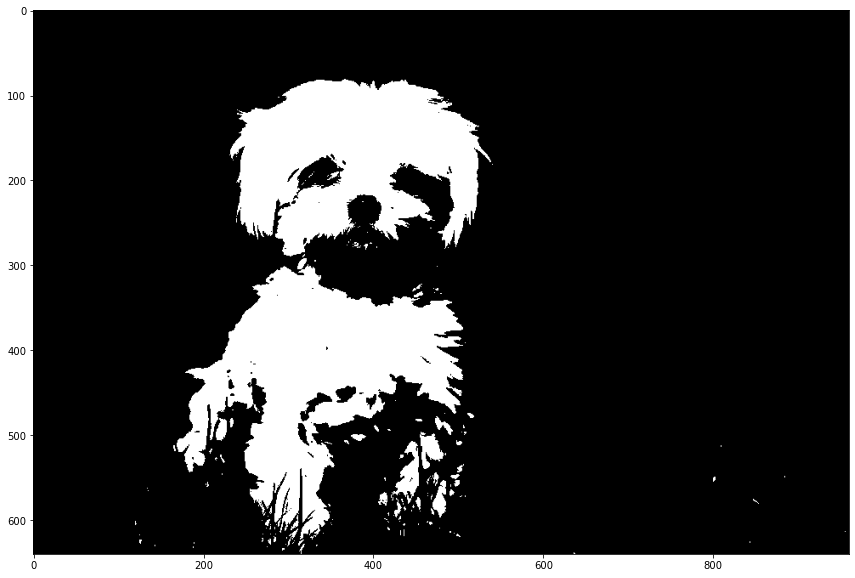

In [42]:
retval, dst = cv2.threshold(src = gray_dog, thresh = 200, maxval = 255, type = cv2.THRESH_BINARY)
print("retval value: ", retval)
print("dst value: ", dst.max())               # if we change maxval there will be change in cv2 not in matplotlib

plt.figure(figsize= (15, 10))
plt.imshow(dst, cmap="gray")

In [43]:
# cv2.imshow("max", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# Otsu Threshold

* It works only in grayscale images
* It is used to calculaie the thresh
* It is the Global Threshold

retval value:  153.0


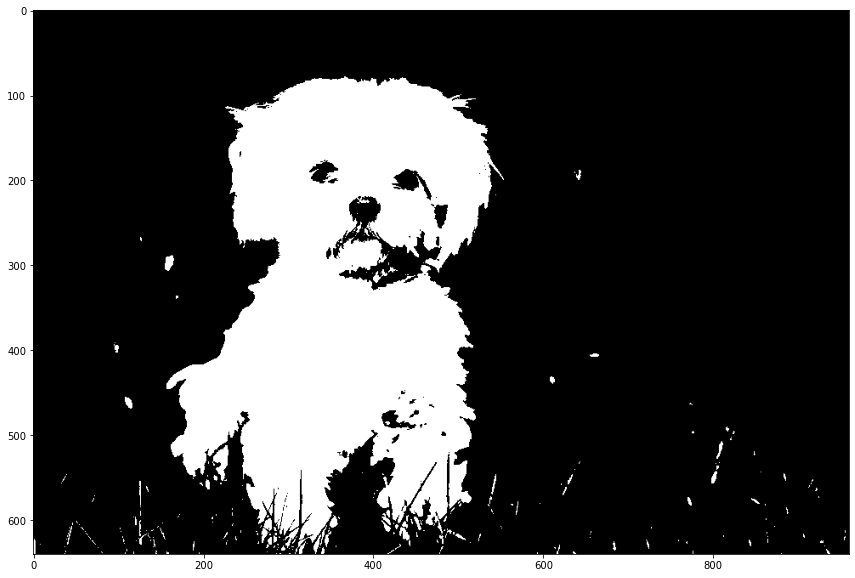

In [44]:
ret, otsu = cv2.threshold(gray_dog, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("retval value: ", ret)                  # otsu calculate the thresh value              

plt.figure(figsize= (15, 10))
plt.imshow(otsu, cmap="gray")

retval value:  153.0


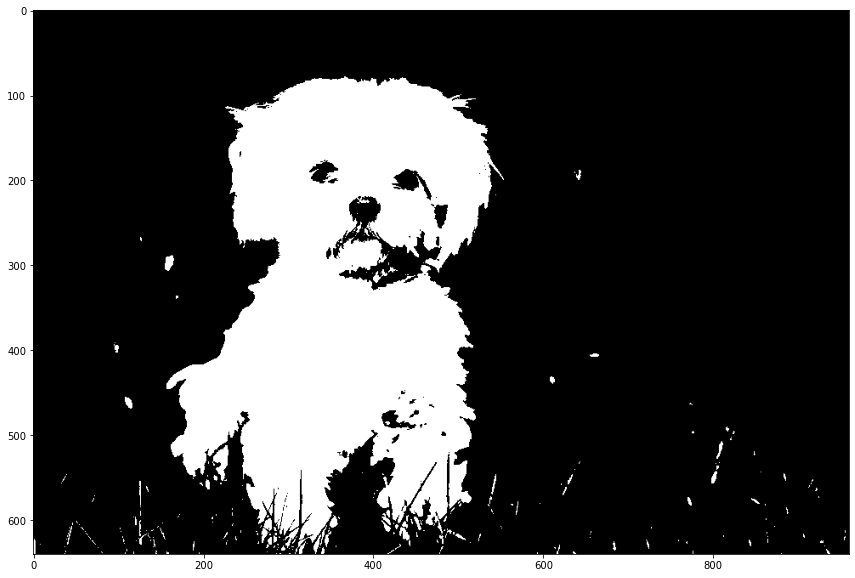

In [45]:
retval, dst = cv2.threshold(gray_dog, thresh = 153, maxval = 255, type = cv2.THRESH_BINARY)
print("retval value: ", retval)                               

plt.figure(figsize= (15, 10))
plt.imshow(dst, cmap="gray")

# Adaptive Threshold

* It is not Global Threshold
* It is used with the neighborhood  in the centre of the blocksizes (threshold) of the pixel
* It is used in the images like that have different light conditions
* The threshold type must be Binary
* Pixel should be in orde (3, 5, 7, 9....) numbers
* It has two types
* The threshold different from the region to region in the pixel

In [46]:
sha = cv2.imread("image\SHADOW-PHOTOGRAPHY_LANDSCAPE_C_LR.jpg", cv2.IMREAD_GRAYSCALE)

In [47]:
type(sha)

numpy.ndarray

In [48]:
sha.shape

(728, 1024)

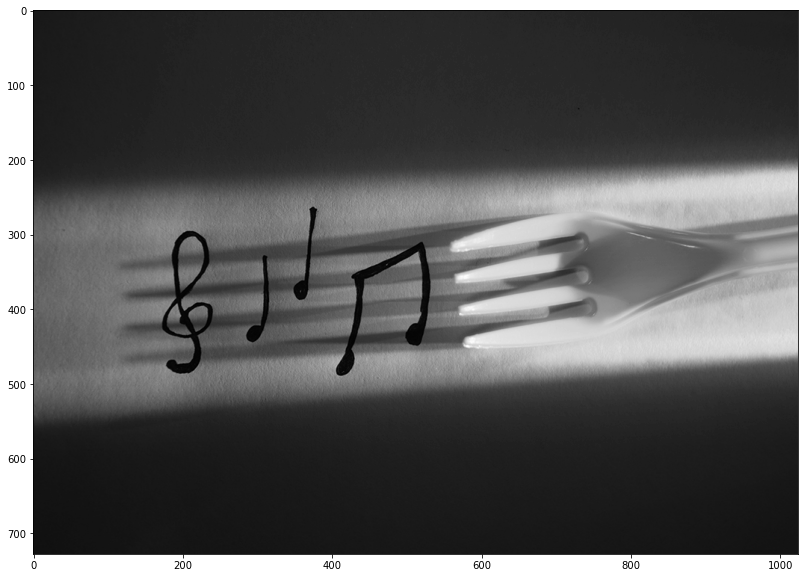

In [49]:
plt.figure(figsize= (15, 10))
plt.imshow(sha, cmap="gray")

In [50]:
dst = cv2.adaptiveThreshold(sha, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 3, C = 3)

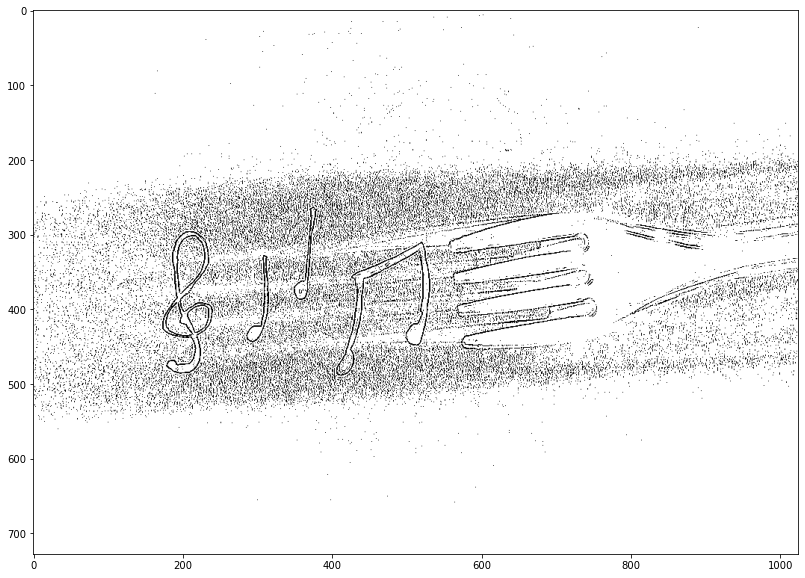

In [51]:
plt.figure(figsize= (15, 10))
plt.imshow(dst, cmap="gray")

retval value:  153.0


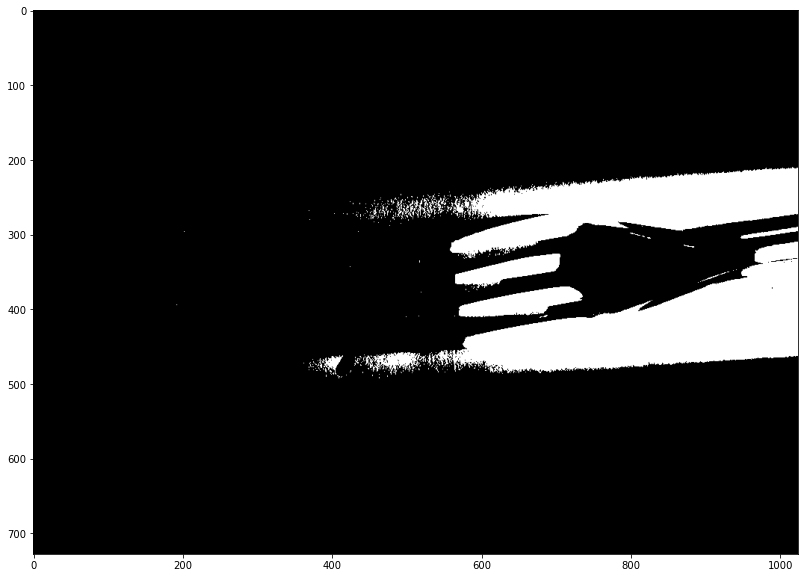

In [52]:
retval, dst = cv2.threshold(sha, thresh = 153, maxval = 255, type = cv2.THRESH_BINARY)
print("retval value: ", retval)                               

plt.figure(figsize= (15, 10))
plt.imshow(dst, cmap="gray")

# Morphological Transformation

* Used in Binary images only
* Background should be in black only
* Two types are Erosion (thin) and Dilation (thick)
* Opening first Erosion next Dilution applied

In [53]:
import numpy as np

In [54]:
kernel = np.ones((3, 3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [55]:
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_cross

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

### Dilation

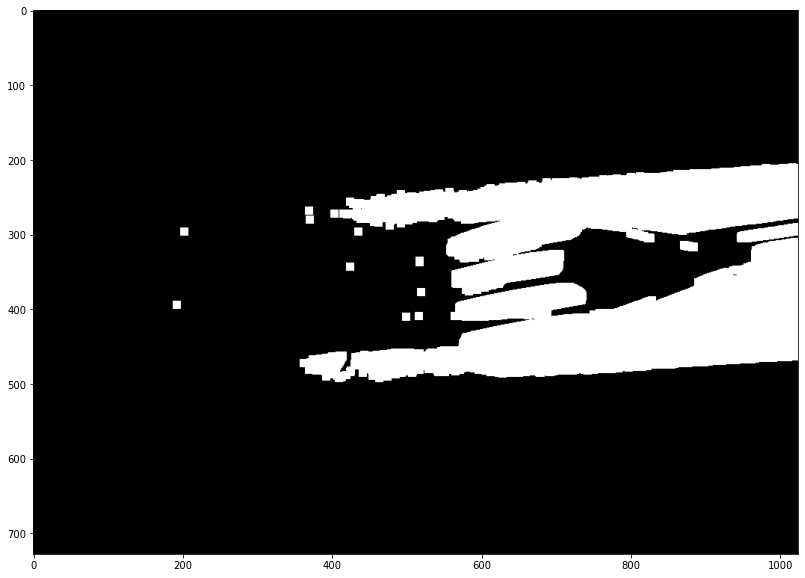

In [56]:
dilation = cv2.dilate(src = dst, kernel = kernel, iterations = 5)
plt.figure(figsize= (15, 10))
plt.imshow(dilation, cmap="gray")

### Erosion

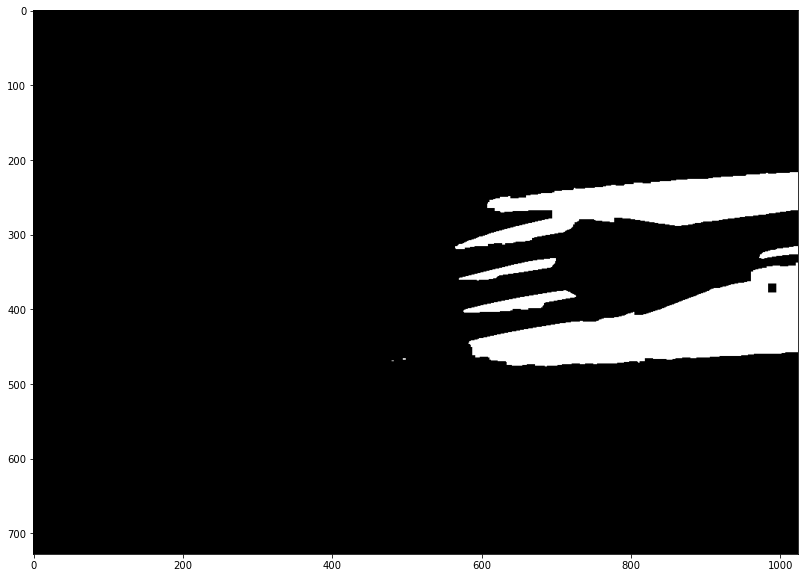

In [57]:
erosion = cv2.erode(src = dst, kernel = kernel, iterations = 5)
plt.figure(figsize= (15, 10))
plt.imshow(erosion, cmap="gray")

### Opening

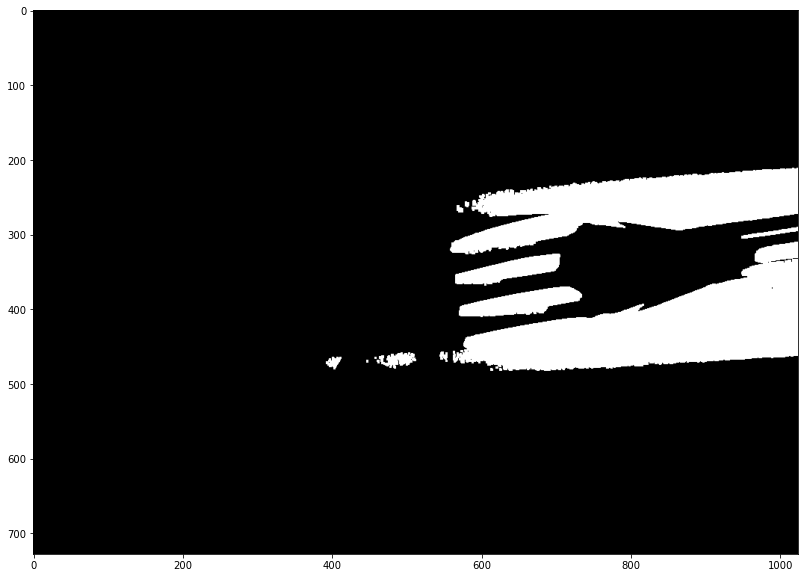

In [58]:
opening = cv2.morphologyEx(src = dst, op = cv2.MORPH_OPEN, kernel = kernel)
plt.figure(figsize= (15, 10))
plt.imshow(opening, cmap="gray")

# Handwritten Numbers

In [59]:
hand = cv2.imread("image\\3.png")

In [60]:
type(hand)

numpy.ndarray

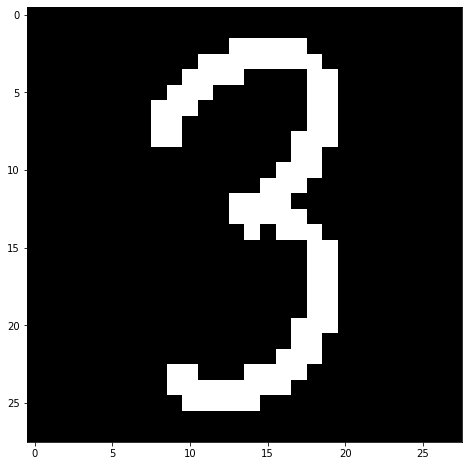

In [67]:
hand = cv2.resize(hand, (28, 28))
rgb_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2RGB)
gray_hand = cv2.cvtColor(rgb_hand, cv2.COLOR_BGR2GRAY)
retval, dst = cv2.threshold(gray_hand, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


plt.figure(figsize= (10, 8))
plt.imshow(dst, cmap="gray")